In [1]:
# import basic operations
import numpy as np
import pandas as pd

# for datatime manipulation
import datetime

# for data visialization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# lets import the dataset
data = pd.read_csv("movie.csv")

# lets check the shape of the dataset
data.shapepe

(9125, 3)

In [3]:
# lets check the head of dataset
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# lets also check the ratings dataset
rating = pd.read_csv("ratings.csv")

# lets check the shape dataset
rating.shape

(100836, 4)

In [5]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# as we are going to perform the content based filtering
# lets merge the rating data with the movie data
data = pd.merge(data, rating, on ="movieId", how="inner")

# let check the shpe of the merged dataset
data.shape

(96811, 6)

In [7]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [8]:
# as we  do not require the MOviueId, UserId and Timestamp lets remove them
data = data.drop(["movieId", "userId", "timestamp"], axis = 1)

data.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [9]:
# now, we have the group by the dataset based on the movie title
data= pd.pivot_table(data, index = ["title", "genres"], aggfunc="mean")
data.reset_index(level=["title", "genres"], inplace=True)
data.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


/home/upgrade/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


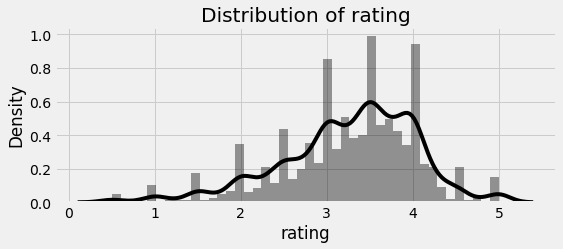

In [10]:
# lets check the distribution of rating across the movies
plt.rcParams["figure.figsize"] = (8,3)
plt.style.use("fivethirtyeight")
sns.distplot(data["rating"], color="black")
plt.title("Distribution of rating")
plt.show()

In [11]:
# lets extract ytear of release from the movie title
data["y"] = data["title"].str.split(" ")
data["year"] = data["y"].apply(lambda x : x[-1])

# let drop the unnecessary "y" column from the dataset
data = data.drop(["y"], axis=1)

# lets remove the opening and closing brackets from the string
data["year"] = data["year"].str.strip(")")
data["year"] = data["year"].str.strip("(")

# lets check the values after extraction
pd.set_option("max_rows", 110)
data["year"].value_counts()

2002    244
1996    240
1995    228
2001    227
2000    225
1998    225
1999    221
1997    217
2004    206
2006    204
1994    198
2003    197
2005    195
2007    195
2009    190
2008    189
2011    180
2010    179
2014    170
2013    166
1993    166
2012    160
2015    148
1988    133
1992    127
1987    123
1990    117
1989    115
1986    115
1991    111
1985    105
1984     77
1982     71
1983     67
1981     64
1980     63
2016     52
1979     48
1977     47
1978     46
1973     41
1974     39
1971     33
1975     32
1965     32
1955     32
1962     32
1959     32
1964     31
1976     31
1972     30
1966     30
1960     30
1963     29
1967     28
1968     28
1953     26
1957     26
1961     25
1958     24
1970     23
1956     22
1969     22
1939     20
1942     20
1954     20
1947     17
1940     17
1946     16
1950     16
1951     16
1948     16
1941     15
1949     15
1937     14
1952     13
1945     13
1944     12
1936     11
1938     10
1931      9
1933      8
1932      8
1934

In [13]:
# there are some dirty values, lets cleam them
data["year"] = data["year"].replace(("2007", "Despot", "Things", "1975-1979", "Road", ""), 
                                    ("2007", "2016", "2016", "1979", "2002", "1996"))
# lets convert the year column into integer data type
data["year"]= data["year"].astype(int)

# lets check the head of the dataset again
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [14]:
# lets remove the year from the movie titles
data["title"] = data["title"].str.split(" ")
data["title"] = data["title"].apply(lambda x: " ".join(x[:-1]))

# lets check the head of the dataset again
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight,Drama|Musical,3.500000,1986
2,'Salem's Lot,Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You,Drama|Romance,4.000000,1997
4,"'burbs, The",Comedy,3.176471,1989
